# INTRODUCTION

**About Pokémon**
<br />
Pokémon, short for "Pocket Monsters," is a globally recognized franchise developed by Game Freak. It was initially released as a pair of video games for the Nintendo Game Boy. The franchise has since expanded into various forms of media, including video games, trading card games, movies, creating a cultural phenomenon. 
<br />
<br />
The pokemon universe revolves around fictional creatures called "Pokémon". Humans participated as Pokémon Trainers, catching and training to battle each other for sport. Each Pokémon belongs to one or more of eighteen elemental types, such as Fire, Water, Grass, and Electric, which determine their strengths and weaknesses against other Pokémon in battles. The goal of  Pokémon games is to become the Pokémon Champion by defeating other Trainers. 
<br />
<br />
**About Pokémon Data Science Project** 
<br />
This project explores the rich and complex dataset of the Pokémon universe. This project aims to provide information into the overall Pokémon game dynamics and battles. Through this project, I intend to:
<br />
* Learn the role of individual Pokémon stats in determining the winner of the battle. 
* Create models to predict the outcomes of Pokémon battles based on available data.
* Create some data visualizations for funsies and explain these graphs for the non-techincal audience. 
* Use it as an opportunity to learn Data science, engaging familiar contexts such as data visualization & analysis, machine learning. 


# Exploratory Data Analysis
I utilized the [two datasets](https://www.kaggle.com/datasets/terminus7/pokemon-challenge/data?select=pokemon.csv) available from Kaggle: one providing individual Pokémon attributes and the other focusing on Pokémon combat. The pokemon.csv file contains detailed information about each Pokémon, including names, 1st & 2nd attack types, hitpoints, defense points, etc. The combat.csv file records combat outcomes, including id of Pokémon battling each other and results of these battles. 
## Importing libraries & files 


In [49]:
#importing libaries 
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
#importing csv files 
pokemon_data = pd.read_csv("pokemon.csv")
battle_data = pd.read_csv("combats.csv")

In [51]:
pokemon_data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [52]:
battle_data.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [53]:
#Checking the dimensions of the individual Pokemon data 
pokemon_data.shape

(800, 12)

In [54]:
battle_data.shape

(50000, 3)

In [55]:
#Checking missing values of the data 
pokemon_data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Notice that there are 386 null values for Type 2. This is because some Pokémon do not have a secondary type. (Some have have secondary classification - one pokemon might be able to breath fire and fly so its "Type 1" would be "fire" but it would also can fly so its "Type 2" would be "flying". **There is one name that is missing.**

In [56]:
#Finding missing name index 
missing_name = pokemon_data[pokemon_data['Name'].isnull()]
print(missing_name.index)

Int64Index([62], dtype='int64')


In [57]:
# Find the names of the Pokémon before and after the missing index
before_missing = pokemon_data.loc[missing_name.index - 1, 'Name']
after_missing = pokemon_data.loc[missing_name.index +1, 'Name']
print("The missing pokemon is between", before_missing, " and",after_missing )


The missing pokemon is between 61    Mankey
Name: Name, dtype: object  and 63    Growlithe
Name: Name, dtype: object


Using the National Pokedex Number, we can look up the Pokémon between Mankey and Growlithe. **It was Primeape!** Update his name in the database!

In [58]:
#Update the missing name
pokemon_data['Name'][62] ="Primeape"

C:\Users\User\AppData\Local\Temp\ipykernel_14992\207690178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_data['Name'][62] ="Primeape"


In [59]:
#Checking the values of the battles data 
count_by_first = battle_data.groupby('Second_pokemon').count()
count_by_second = battle_data.groupby('First_pokemon').count()
number_wins = battle_data.groupby('Winner').count()

In [60]:
count_by_first

,First_pokemon,Winner
Second_pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62
...,...,...
796,56,56
797,67,67
798,59,59


In [61]:
count_by_first.shape

(784, 2)

In [62]:
count_by_second.shape

(784, 2)

In [63]:
number_wins.shape

(783, 2)

In [64]:
number_wins

,First_pokemon,Second_pokemon
Winner,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55
...,...,...
796,39,39
797,116,116
798,60,60


We can see that the number of dimensions is different in the total wins. This can only mean there is one Pokémon that was unable to win during it's fights. Lets find that Pokémon!

In [65]:
winners = set(battle_data['Winner'])
losers = set(battle_data['First_pokemon'])
pokemon_never_won = losers - winners
print(pokemon_never_won)

{231}


In [66]:
print("Pokémon that  was unable to win during it's fights is ", pokemon_data['Name'][230]) #231 is the , 230 is the index

Pokémon that  was unable to win during it's fights is  Shuckle


This actually makes sense because Shuckle is known for its extremely high Defense, which makes it one of the most resilient Pokémon in terms of enduring attacks. However, Shuckle's Attack stats are significantly lower compared to many other Pokémon. **We will add  Shuckle to the data so that the array lengths are the same. This will make merging the two datasets easier**

In [67]:
number_wins = number_wins.append({'Winner': 231, 'Count': 0}, ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14992\3083723115.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  number_wins = number_wins.append({'Winner': 231, 'Count': 0}, ignore_index=True)


We now have a comprehensive Pokémon dataset. Now we could perform some analyses to explore various aspects of the Pokémon universe, from drawing the correlation between generation and attack attempt to predicting the battle outcome.  

# Performing Analysis on Individual Pokémon Data

In [68]:
pokemon_data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [69]:
pokemon_data.dtypes #outputing the data type of each column

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [70]:
pokemon_data.describe() #summary of statistics for the numerical columns

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Pokemon Categorization by types

In [71]:
by_types = pokemon_data['Type 1'].value_counts() #Count number of pokemon by its Type 1 

In [72]:
by_types_df = pd.DataFrame(list(by_types.items()), columns = ['Type','Count'])

In [73]:
by_types_df

,Type,Count
0,Water,112
1,Normal,98
2,Grass,70
3,Bug,69
4,Psychic,57
5,Fire,52
6,Electric,44
7,Rock,44
8,Dragon,32
9,Ground,32


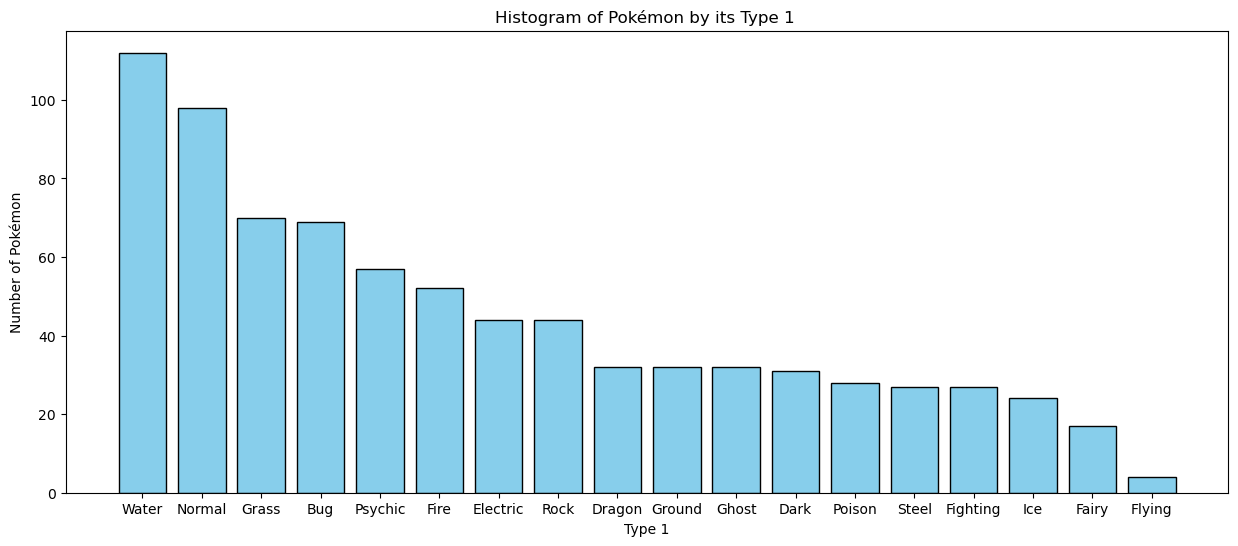

In [74]:
# Plot the histogram
plt.figure(figsize=(15, 6))
plt.bar(by_types_df['Type'], by_types_df['Count'], color='skyblue', edgecolor='black')
plt.title('Histogram of Pokémon by its Type 1 ')
plt.xlabel('Type 1')
plt.ylabel('Number of Pokémon')
plt.show()

**Comments:** 
- Water-type Pokémon are the most common, with 112 Pokémon falling into this category. 
- Normal type is the second most common, these Pokémon are versatile and often have balanced stats. 
- Dragon, Ground, Ghost, and Dark types have around 31-32 Pokémon each. These types are often considered more specialized or rare.
- Fairy (17) and Flying (4) types are the least common in this dataset. Fairy types were introduced later in the series, which could explain their lower numbers. Flying types often appear as secondary types rather than primary, that's why it has the lowest figure. 

### Box plots of Pokémon's attributes

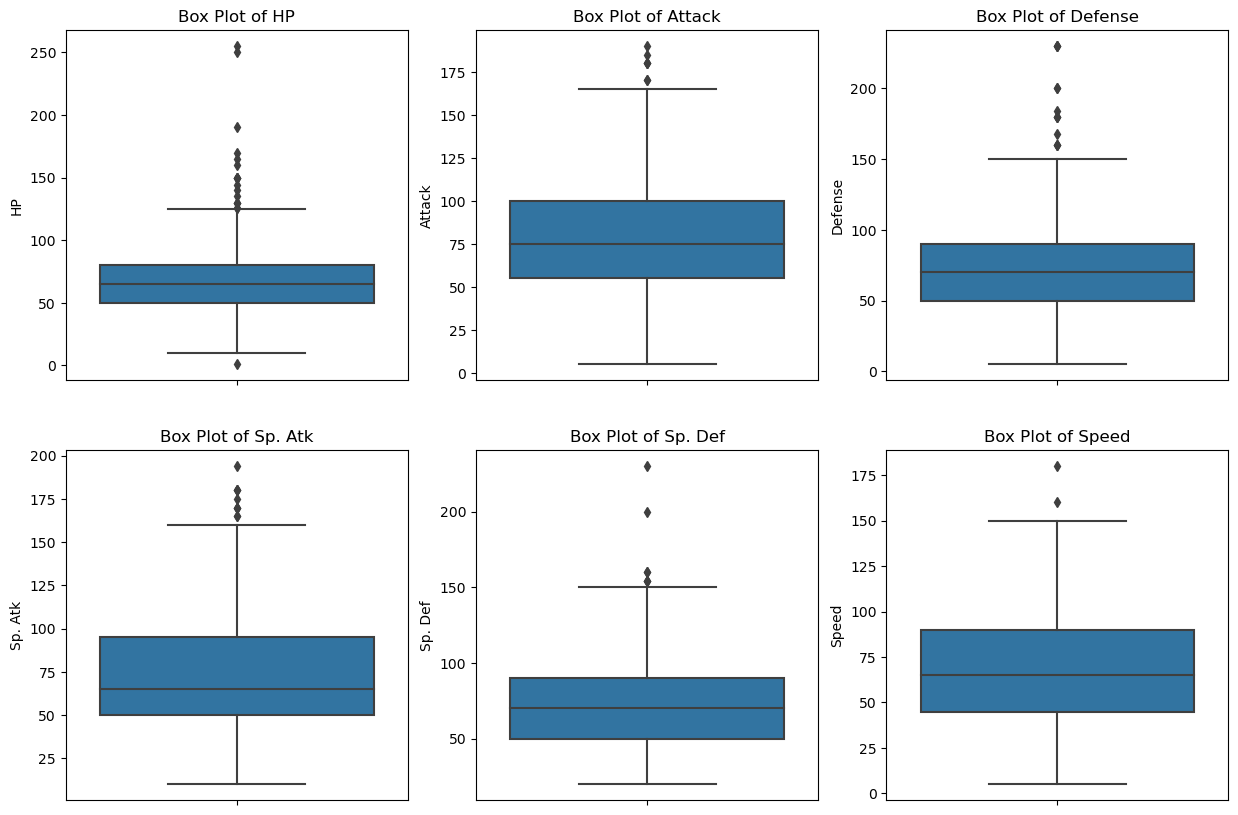

In [75]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
plt.figure(figsize=(15, 10))
# Create box plots for each attribute
for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 3, i)  # Arrange plots in 2 rows and 3 columns
    sns.boxplot(y=pokemon_data[attribute])
    plt.title(f'Box Plot of {attribute}')
plt.show()

### Box plots of Pokémon's attributes by types

Now, we will plot the box plots of Pokémon attributes (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) categorized by type. This will provide useful information for trainers to make decisions on team compesitions and strategies on combats. 

In [76]:
pokemon_attributes = pokemon_data.melt(id_vars=['Type 1'], value_vars=attributes, var_name='Attribute', value_name='Value')


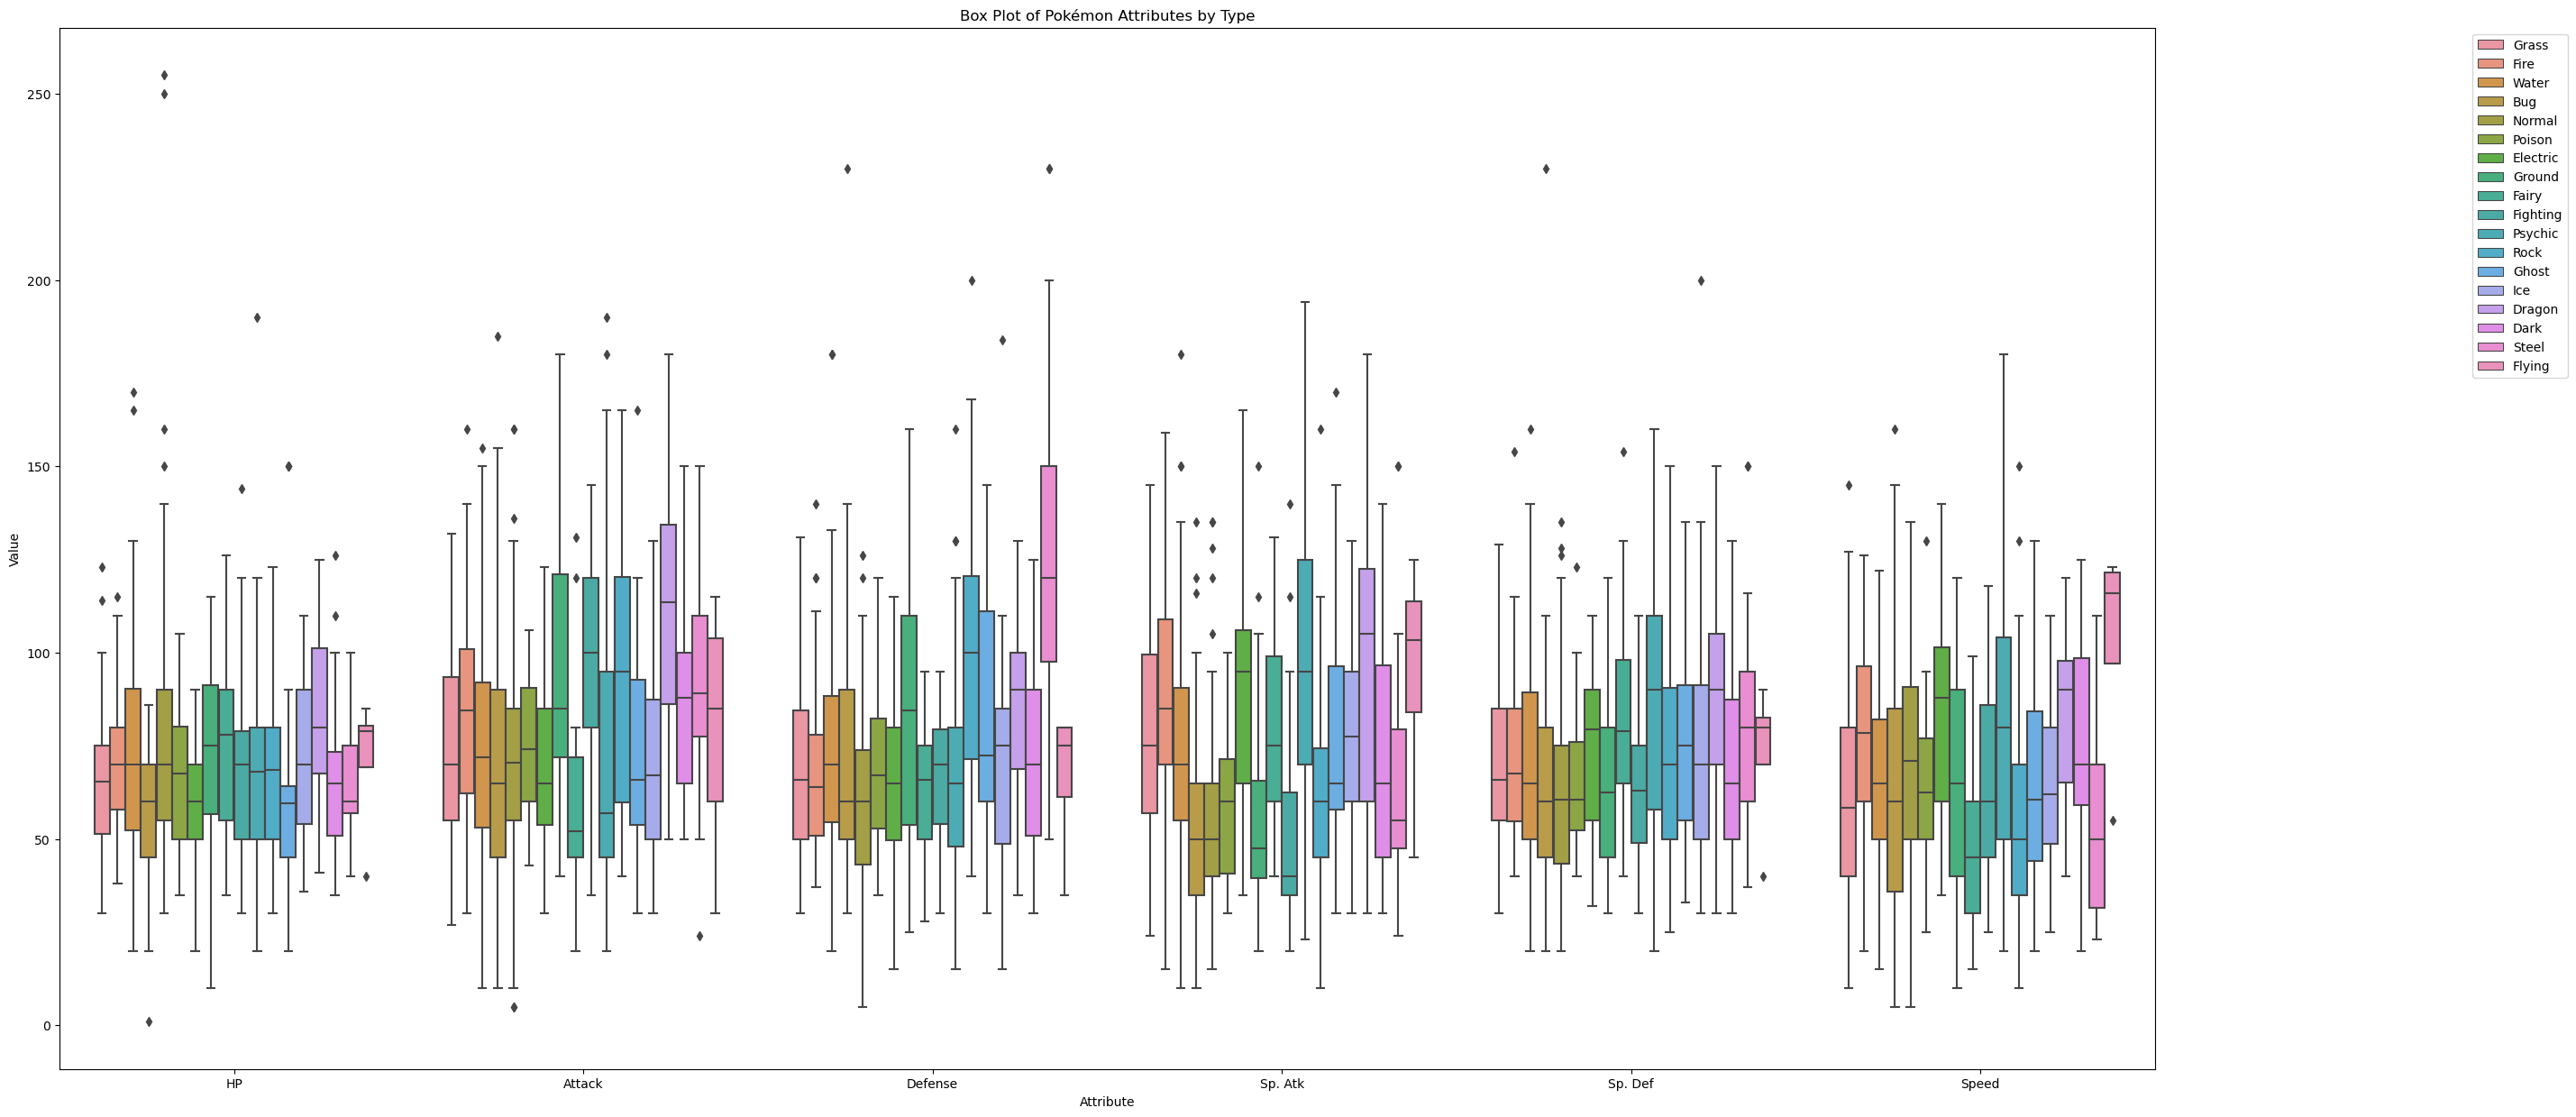

In [77]:
# Create the box plots
plt.figure(figsize=(30, 15))
sns.boxplot(x='Attribute', y='Value', hue='Type 1', data=pokemon_attributes)
plt.title('Box Plot of Pokémon Attributes by Type')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

**Comments:**
- Water and Normal types show a wide range of HP values, which is understandable because they have the highest number of Pokemon species. Bug types have generally lower HP.
- Dragon, Fighting, and Rock types typically have higher attack values. Electric and Fairy types show lower attack values.
- Steel and Rock types are characterized by high defense, making them durable in battles.
- Dragon, Flying and Psychic types show higher special defense.
- Electric, Dragon and Flying types demonstrate high speeds. 

**Understanding the distribution of these attributes helps in building well-balanced teams. For instance, including a high HP Water type and a high Speed Electric type can result in multiple strategic needs to win a battle.**


### Machine Learning Model to predict if a Pokémon is legendary 

If a Pokémon is legendary, it's rare and incredibly powerful. By looking at individual's stats, we could train our computer to recognize patterns that help it decide if a Pokémon is legendary or not.

In [78]:
# Split data into features and target
X = pokemon_data[attributes]
y = pokemon_data['Legendary'].astype(int) #Convert 'Legendary' column to binary

In [79]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

We will use Random Forest for classifying Pokémon. It's a great choice for this task because the algorithm let us know which features (attributes) are most important in making predictions, helping us understand what characteristics are common among legendary Pokémon.

In [80]:
#Model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Initialize the model 
rf_mod = RandomForestClassifier(n_estimators=100, random_state=222)

# Train the model
rf_mod.fit(X_train, y_train)

# Make predictions
y_pred = rf_mod.predict(X_test)

In [81]:
#Model evaluation
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy of Random forest is {accuracy}%')

Accuracy of Random forest is 92.5%


**We got the result of 92.5% accuracy. Not too bad for the first time trying!** To improve the Random Forest Model, we couls use **GridSearchCV** to systematically tune the hyperparameters of the Random Forest Model and find the optimal set. GridSearchCV also performs cross-validation on each set of hyperparameters, which is more reliable compared to a single train-test split. We will also ensure the features are on a similar scale (standardized) this time. 

In [82]:
#Use GridSearchCV to tune a Random Forest model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# Transform the features data
X_train_standardized = StandardScaler().fit_transform(X_train)
X_test_standardized = StandardScaler().fit_transform(X_test)    

# Define the parameter grid
param_grid = {
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [5, 10, 20, 30],
    'n_estimators': [100, 200, 300]
}


# Initialize the new Random Forest model
rf_improved = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_improved, param_grid=param_grid, cv=10, scoring='accuracy')
#10-fold cross-validation

# Fit GridSearchCV
grid_search.fit(X_train_standardized, y_train)

# Print the best parameters found
print("Best Parameters for the Random Forest Model is:", grid_search.best_params_)


Best Parameters for the Random Forest Model is: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}


In [83]:
# Predict using the best estimator
best_rf = grid_search.best_estimator_
y_pred_new = best_rf.predict(X_test_standardized)

#Model evaluation (Improved Random Fprest)
accuracy = accuracy_score(y_test, y_pred_new)*100
print(f'Accuracy of the Improved Random forest is {accuracy}%')

Accuracy of the Improved Random forest is 92.5%


**The model performance doesn't improve much from the previous model. I will continue experimenting with different algorithms (XGBoost, Support Vector Machines - SVM, Logistic Regression) and compare them in terms of predictive accuracy.**

In [84]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier()
}

Logistic Regression Accuracy: 91.25%
SVM Accuracy: 93.12%
KNN Accuracy: 92.50%
Gradient Boosting Accuracy: 91.88%
Random Forest Accuracy: 92.50%


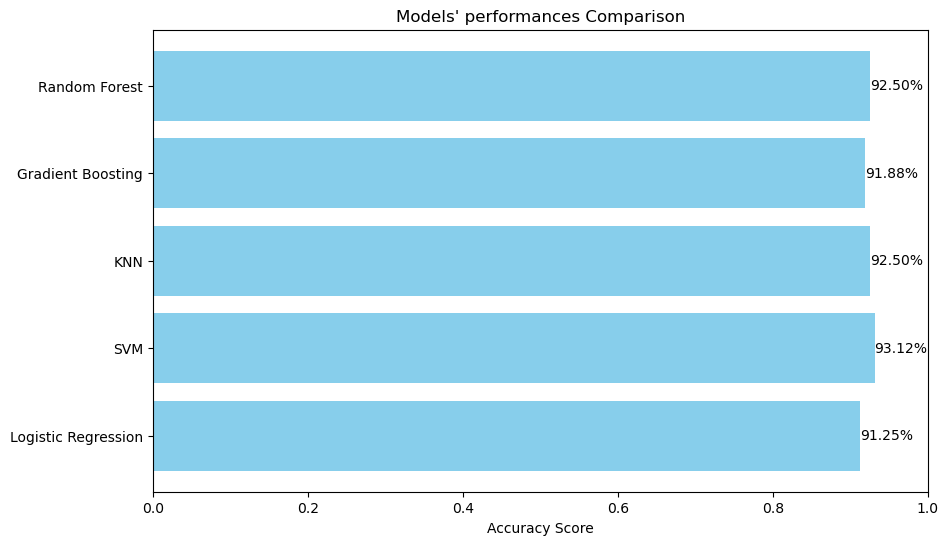

In [88]:
# Train and evaluate each model
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train_standardized, y_train)
    y_pred = model.predict(X_test_standardized)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

# Plotting the accuracy scores
model_names = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Models\' performances Comparison')
plt.xlim(0, 1) # Accuracy ranges between 0 and 1
for index, value in enumerate(scores):
    plt.text(value, index, f'{value*100:.2f}%', va='center')
plt.show()

**SVM outperformed other models with a 93.12% of accuracy. Just like with Random Forest model, we could use GridSearchCV to find the optimal hyperparameters for the SVM model.**

In [89]:
from sklearn.svm import SVC

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')

# Fit the GridSearchCV
grid_search_svm.fit(X_train_standardized, y_train)

# Get the best parameters and evaluate the model
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test_standardized)
accuracy_svm = accuracy_score(y_test, y_pred_svm)*100
print(f"Improved SVM Accuracy: {accuracy_svm}%")


Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Improved SVM Accuracy: 93.125%


**Nothing changes. Let's try appplying the Principal Component Analysis (PCA) technique to help the model focus on the most important features.**

In [94]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

# Train the model using PCA-transformed data
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)*100
print(f"SVM with PCA Accuracy: {accuracy_pca}%")

SVM with PCA Accuracy: 93.125%


**Once again, the model gave us 93.13%. Further improvements may require deeper changes to the feature set or exploration of additional data. Overall, the SVM model provided good results for this classification task and I'm satisifed for now. We will move on to the next question.**

### Machine Learning Model to predict if a Pokémon won a battle 

In [ ]:
# Merge the winning dataset and the original pokemon dataset
combine_data = pd.merge(pokemon_data, win_count, right_index = True, left_on='#')

In [ ]:
win_count = battle_data.groupby('Winner').count()

# Merge the winning dataset and the original pokemon dataset
combine_data = pd.merge(pokemon_data, win_count, right_index = True, left_on='#')

In [ ]:
win_count = win_count.sort_index()

In [ ]:
win_count

In [ ]:
#Merge the winning dataset and the original pokemon dataset
combine_data = pd.merge(pokemon_data, win_count, right_index = True, left_on='#', how ='inner')

In [ ]:
combine_data.head()